# Using unlabelled, unfractionated datasets obtained from QExact and VOrbi instruments
* Datasets were searched against H_sapiens_Uniprot_SPROT_2017-04-12, Tryp_Pig_Bov sequence files using MSGFPlus
* Combined results with MASIC results (Q <= 0.01) to get quantitation data

In [89]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [90]:
import Classification_Utils as cu
import MaxQuant_Postprocessing_Functions as mq
import numpy as np
from os import listdir
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.externals import joblib
from sklearn import preprocessing

## Load (and combine?) data from all tissues

In [91]:
HIGH_QUAL_DIR = 'F:\High_Quality\\'
MIXED_QUAL_DIR = 'F:\Mixed_Quality\\'
LOW_QUAL_DIR = 'F:\Low_Quality\\'

files_dir = HIGH_QUAL_DIR

file_paths = listdir(files_dir) 

df = cu.combine_csvs(files_dir, file_paths)

In [92]:
df.dropna(axis='index', how='all', inplace=True) # drop any rows where all values are missing

original_df = df.copy()

print(df.shape)
df.head()

(118638, 79)


,Blood_Plasma_CPTAC_TrypDige_undepleted_normal_19Apr13_Methow_13-02-13,Blood_Plasma_Darpa_2_human_02_23Jan17_Arwem_16-10-25,Blood_Plasma_OMICS_EBV_HP_UW001_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW002_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW003_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW004_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW005_8Apr16_Arwen_16-01-03,Blood_Plasma_RZHJ_012_16Jun10_Owl_10-02-04,Blood_Plasma_Trypsin_Digestion_Step5_Sample1_4Mar13_Lynx_13-02-11,Blood_Plasma_Trypsin_Digestion_Step5_Sample2_4Mar13_Lynx_13-02-11,...,Temporal_Lobe_01,Temporal_Lobe_02,Temporal_Lobe_03,Temporal_Lobe_04,Temporal_Lobe_05,Temporal_Lobe_06,Temporal_Lobe_07,Temporal_Lobe_08,Temporal_Lobe_09,Temporal_Lobe_10
Peptide,,,,,,,,,,,,,,,,,,,,,
\n-.DIQM*TQSPSTLSASVGDR.V,111460000.0,4776900.0,NaN,6.740800e+08,1.013200e+09,NaN,201570000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\n-.DIQM*TQSPSTLSASVGDRVTITCR.A,NaN,NaN,NaN,1.665500e+09,1.889800e+09,NaN,750580000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\n-.DIQMTQSPS.T,113990000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\n-.DIQMTQSPSTLSASVGDR.V,87789000.0,271390000.0,NaN,NaN,2.841000e+09,NaN,217430000.0,NaN,12897000.0,29051000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\n-.DIQMTQSPSTLSASVGDRVTITCR.A,NaN,NaN,NaN,NaN,6.444900e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean data
* Log2 transform
* Impute missing values
* Mean/Median normalize

In [93]:
mq.log2_normalize(df)

df_min = df.min().min()
impute_val = df_min/2
df = df.fillna(impute_val)

# median normalize
mq.median_normalize(df)
#df.iloc[:,:] = preprocessing.RobustScaler().fit_transform(df)

C:\Users\kush494\Documents\Proteomics_Data_Processing\MaxQuant_Postprocessing_Functions.py:149: RuntimeWarning: divide by zero encountered in log2
  df.iloc[:,:] = np.log2(df.iloc[:,:])


## Map each column to a corresponding label

In [94]:
tissues = ['Blood_Plasma', 'Blood_Serum', 'Liver', 'Monocyte', 'Ovary', 'Pancreas', 'Substantia_Nigra', 'Temporal_Lobe']
            
tissues_to_columns = cu.map_tissues_to_columns(df, tissues)
#tissues_to_columns

In [95]:
column_names = df.columns.values.tolist()
labels = cu.get_labels(column_names, tissues_to_columns)

# Sort columns by tissue type for visualization purposes

In [ ]:
df.head()

,Blood_Plasma_CPTAC_TrypDige_undepleted_normal_19Apr13_Methow_13-02-13,Blood_Plasma_Darpa_2_human_02_23Jan17_Arwem_16-10-25,Blood_Plasma_OMICS_EBV_HP_UW001_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW002_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW003_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW004_8Apr16_Arwen_16-01-03,Blood_Plasma_OMICS_EBV_HP_UW005_8Apr16_Arwen_16-01-03,Blood_Plasma_RZHJ_012_16Jun10_Owl_10-02-04,Blood_Plasma_Trypsin_Digestion_Step5_Sample1_4Mar13_Lynx_13-02-11,Blood_Plasma_Trypsin_Digestion_Step5_Sample2_4Mar13_Lynx_13-02-11,...,Temporal_Lobe_01,Temporal_Lobe_02,Temporal_Lobe_03,Temporal_Lobe_04,Temporal_Lobe_05,Temporal_Lobe_06,Temporal_Lobe_07,Temporal_Lobe_08,Temporal_Lobe_09,Temporal_Lobe_10
Peptide,,,,,,,,,,,,,,,,,,,,,
\n-.DIQM*TQSPSTLSASVGDR.V,26.731951,22.187643,3.803443,29.328345,29.916272,3.803443,27.586706,3.803443,3.803443,3.803443,...,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443
\n-.DIQM*TQSPSTLSASVGDRVTITCR.A,3.803443,3.803443,3.803443,30.633308,30.815586,3.803443,29.483431,3.803443,3.803443,3.803443,...,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443
\n-.DIQMTQSPS.T,26.764332,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,...,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443
\n-.DIQMTQSPSTLSASVGDR.V,26.387537,28.015792,3.803443,3.803443,31.403752,3.803443,27.695976,3.803443,23.620532,24.792084,...,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443
\n-.DIQMTQSPSTLSASVGDRVTITCR.A,3.803443,3.803443,3.803443,3.803443,32.585511,3.803443,3.803443,3.803443,3.803443,3.803443,...,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443,3.803443


### Optional step to compare results - Pairwise transform data

In [ ]:
df = cu.keep_k_best_features(df, labels, 500)
df = cu.pairwise_transform(df)

## Visualize data
* Normalized boxplots
* Scree plot
* PCA plot
* Pearson Matrix

In [83]:
image_dir = r'D:\Images\Human_Tissues\\'

column_to_color = mq.map_colors(tissues, tissues_to_columns, 8)

In [42]:
mq.make_seaborn_boxplot(df, image_dir, 'Median_normalized_boxplots', column_to_color)

In [84]:
#scaled_data = preprocessing.scale(df.T)
scaled_data = df.T

pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for dataframe

per_var, pca_labels = mq.make_scree_plot(pca, image_dir)
mq.draw_pca_graph2(column_names, pca_data, image_dir, column_to_color, per_var, pca_labels, tissues, tissues_to_columns, 'Pairwise_Ratios_500peptides')
#mq.draw_pca_graph(column_names, pca_data, image_dir, column_to_color, per_var, pca_labels, 'PCA_RobustScaler_Annotated')

C:\Users\kush494\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [44]:
mq.make_pearson_matrix(df, image_dir)

## Test various classifiers using cross-validation

In [85]:
NUM_FOLDS = 8
transformed_df = df.T

### Decision Tree

In [86]:
dt = cu.decisiontree_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.38  0.33  0.38  0.38  0.38  0.38  0.38  0.38]
Accuracy: 0.37 (+/- 0.03)


### KNN

In [87]:
knn = cu.knn_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.38  0.33  0.38  0.38  0.38  0.38  0.38  0.38]
Accuracy: 0.37 (+/- 0.03)


### Logistic Regression

In [88]:
lr = cu.logistic_regression_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.38  0.33  0.38  0.38  0.38  0.38  0.38  0.38]
Accuracy: 0.37 (+/- 0.03)


### Naive Bayes
* Gaussian
* Multinomial

In [25]:
gnb = cu.bayes_gaussian_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.88  1.    1.    0.88  1.    0.88  0.88  1.  ]
Accuracy: 0.94 (+/- 0.12)


In [26]:
mnb = cu.bayes_multinomial_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 1.    0.93  1.    1.    1.    0.88  1.    1.  ]
Accuracy: 0.98 (+/- 0.09)


### SVC variations

In [27]:
svc = cu.SVC_models_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.94  1.    1.    1.    1.    0.88  1.    1.  ]
Accuracy: 0.98 (+/- 0.09)
Scores: [ 1.    1.    1.    1.    1.    0.88  1.    1.  ]
Accuracy: 0.98 (+/- 0.08)
Scores: [ 0.12  0.13  0.12  0.12  0.12  0.12  0.12  0.12]
Accuracy: 0.13 (+/- 0.01)
Scores: [ 0.75  0.6   0.62  0.88  0.62  0.75  0.75  0.75]
Accuracy: 0.72 (+/- 0.17)


### Aggregations
* Random Forest
* Gradient Boosting

In [28]:
rf = cu.randomforest_model_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 1.    0.93  1.    0.88  1.    0.88  0.88  1.  ]
Accuracy: 0.94 (+/- 0.12)


In [29]:
gbc = cu.gradient_boosting_crossval(transformed_df, labels, NUM_FOLDS)

Scores: [ 0.81  0.87  1.    1.    1.    0.88  1.    1.  ]
Accuracy: 0.94 (+/- 0.15)


## Tune parameters of best models 
* Check accuracy score and F1 score (measure of precision and recall)

In [48]:
import time
start_time = time.time()

### Gradient Boosting grid search

In [49]:
gbc_grid = cu.gbc_grid_search(NUM_FOLDS, 2)

gbc_grid.fit(transformed_df, labels)

print('Best Gradient Boosting parameters:\n', gbc_grid.best_params_)
print('\nBest Cross-Validation score:\n', gbc_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

KeyboardInterrupt: 

### Random Forest grid search

In [ ]:
rf_grid = cu.rf_grid_search(NUM_FOLDS, 2)

rf_grid.fit(transformed_df, labels)

print('Best Random Forest parameters:\n', rf_grid.best_params_)
print('\nBest Cross-Validation score:\n', rf_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

### SVC grid search

In [ ]:
svc_grid = cu.svc_grid_search(NUM_FOLDS, 2)

svc_grid.fit(transformed_df, labels)

print('Best SVC parameters:\n', svc_grid.best_params_)
print('\nBest Cross-Validation score:\n', svc_grid.best_score_)

print("--- %s minutes ---" % ((time.time() - start_time)/60))

## PCA of data reduced according to best grid search reduction method

In [ ]:
from sklearn.feature_selection import SelectPercentile

percentile_75_df = SelectPercentile(percentile=75).fit_transform(transformed_df, labels)
percentile_75_df.shape

In [ ]:
pca_percentile = PCA() # create a PCA object
pca_percentile.fit(percentile_75_df) # do the math
pca_data_percentile = pca_percentile.transform(percentile_75_df) # get PCA coordinates for dataframe

per_var_percentile, pca_labels_percentile = mq.make_scree_plot(pca_percentile, image_dir, 'Scree_75_Percentile')
mq.draw_pca_graph2(column_names, pca_data_percentile, image_dir, column_to_color, per_var_percentile, pca_labels_percentile, tissues, tissues_to_columns, 'PCA_75_Percentile')

## Top expressed peptides per tissue

In [ ]:
cu.print_top_n_features(df, rf, 10)
cu.print_top_n_features_coef(df, lr, 10, tissues)

## Save model
* Save array/dataframe of features (via joblib) along with final model
* Write script to classify new data-- load features and fit new data on them

In [30]:
filename = r'Trained_Models\highqual_crossval_lr.sav'
joblib.dump(lr, open(filename, 'wb'))

### Load model and predict new data

In [31]:
filename = r'Trained_Models\highqual_crossval_lr.sav'
# some time later...

# load the model from disk
loaded_model = joblib.load(open(filename, 'rb'))

fake_new_data = original_df.add_suffix('_2')

In [32]:
pred_data = cu.fit_new_data(original_df, fake_new_data)

pred = loaded_model.predict(pred_data)
result = loaded_model.score(pred_data, labels)

print(result)

C:\Users\kush494\Documents\Proteomics_Data_Processing\Classifiers\Classification_Utils.py:511: RuntimeWarning: divide by zero encountered in log2
  fitted_data.iloc[:,:] = np.log2(fitted_data.iloc[:,:])


1.0


##  Confusion matrices of best models' predictions on new data

Confusion matrix, without normalization
[[10  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0 10]]
Normalized confusion matrix
[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]]


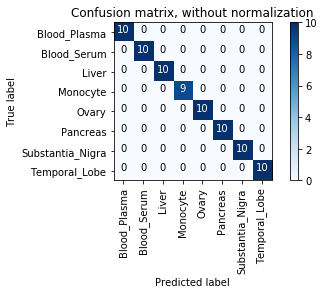

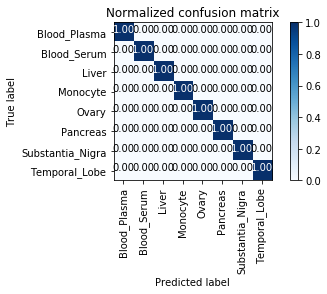

In [45]:
cu.show_confusion_matrices(labels, pred, tissues)